In [ ]:

# load in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
import io
import math
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
## import the dataset
# load in some dataset
from google.colab import files
data = files.upload()

Saving Data_project_2025 (1).csv to Data_project_2025 (1).csv


In [ ]:
# see the data
filename = list(data.keys())[0]  # Get uploaded file name
df = pd.read_csv(filename)
df

,Unnamed: 0,GDPC1,GDP_Change,LN_GDP,GDP_Growth,GDP_Growth_1Q_Ann,GDP_Growth_2Q_Ann,GDP_Growth_3Q_Ann,GDP_Growth_4Q_Ann,GDP_Growth_5Q_Ann,GDP_Growth_6Q_Ann,GDP_Growth_7Q_Ann,GDP_Growth_8Q_Ann,RSPREAD
0,1960-01-31,3123.162,68.058,8.046601,0.022032,8.812926,5.191280,3.203823,4.805450,5.318983,5.973920,6.426550,5.952048,0.613333
1,1960-04-30,3111.310,-11.852,8.042799,-0.003802,-1.520836,3.646045,2.953908,2.022658,3.540193,4.179013,4.903240,5.433127,1.266667
2,1960-07-31,3119.057,7.747,8.045286,0.002487,0.994741,-0.263048,2.762277,2.464116,1.817075,3.115951,3.724117,4.414678,1.473333
3,1960-10-31,3081.300,-37.757,8.033107,-0.012179,-4.871651,-1.938455,-1.799249,0.853795,0.996963,0.702287,1.974865,2.649646,1.580000
4,1961-01-31,3102.251,20.951,8.039883,0.006776,2.710556,-1.080547,-0.388784,-0.671797,1.225147,1.282562,0.989183,2.066826,1.436667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2016-10-31,16851.420,73.272,9.732190,0.004358,1.743040,2.242653,2.232822,1.819270,1.552320,1.563182,1.726221,1.908810,1.700000
228,2017-01-31,16903.240,51.820,9.735261,0.003070,1.228157,1.485599,1.904488,1.981656,1.701048,1.498293,1.515321,1.663963,1.853333
229,2017-04-30,17031.085,127.845,9.742795,0.007535,3.013954,2.121055,1.995050,2.181854,2.188116,1.919865,1.714816,1.702650,1.373333
230,2017-07-31,17163.894,132.809,9.750563,0.007768,3.107115,3.060534,2.449742,2.273067,2.366907,2.341282,2.089472,1.888853,1.206667


In [ ]:
# first let's split the data into train and test
# from the 1981[1] to 2002[3] will be train and from 2002[4] to 2017[4]

df.rename(columns={df.columns[0]: "date"}, inplace=True)
df["date"] = pd.to_datetime(df["date"])




# Split data into train and test
train_df = df.loc[(df["date"] >= "1981-01-01") & (df["date"] <= "2002-09-30")]
test_df = df.loc[(df["date"] >= "2002-10-01") & (df["date"] <= "2017-12-31")]
train_df # display the dataframes

,date,GDPC1,GDP_Change,LN_GDP,GDP_Growth,GDP_Growth_1Q_Ann,GDP_Growth_2Q_Ann,GDP_Growth_3Q_Ann,GDP_Growth_4Q_Ann,GDP_Growth_5Q_Ann,GDP_Growth_6Q_Ann,GDP_Growth_7Q_Ann,GDP_Growth_8Q_Ann,RSPREAD
84,1981-01-31,6635.726,134.542,8.800223,0.020484,8.193507,7.769359,4.977394,1.684062,1.605607,1.510372,1.703449,1.551012,-1.430000
85,1981-04-30,6587.269,-48.457,8.792894,-0.007329,-2.931694,2.630907,4.202341,3.000122,0.760910,0.849390,0.875791,1.124056,-1.156667
86,1981-07-31,6662.858,75.589,8.804304,0.011410,4.563870,0.816088,3.275228,4.292724,3.312871,1.394737,1.380030,1.336801,-0.206667
87,1981-10-31,6585.127,-77.731,8.792569,-0.011735,-4.693960,-0.065045,-1.020595,1.282931,2.495387,1.978399,0.524923,0.620781,2.336667
88,1982-01-31,6474.973,-110.154,8.775700,-0.016869,-6.747673,-5.720817,-2.292588,-2.452364,-0.323190,0.954877,0.731818,-0.384151,1.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2001-07-31,12670.106,-40.197,9.447001,-0.003168,-1.267026,0.423855,-0.097117,0.493953,0.491326,1.656875,1.585752,2.247996,1.810000
167,2001-10-31,12705.269,35.163,9.449772,0.002771,1.108572,-0.079227,0.652094,0.204305,0.616876,0.594201,1.578546,1.526104,2.863333
168,2002-01-31,12822.258,116.989,9.458938,0.009166,3.666311,2.387441,1.169286,1.405648,0.896706,1.125115,1.033073,1.839517,3.356667
169,2002-04-30,12893.002,70.744,9.464440,0.005502,2.200847,2.933579,2.325243,1.427176,1.564688,1.114063,1.278791,1.179045,3.386667


In [ ]:
# In this cell I am trying to get correct X and Y matrices
# for the regression 1

X1 = pd.DataFrame()


X1[f"GDP_Growth_lag{1}"] = train_df["GDP_Growth"]
X1[f"GDP_Growth_lag{2}"] = train_df["GDP_Growth"].shift(1)


X1 = sm.add_constant(X1)
X1 = X1.dropna()
X1 = X1.iloc[:-1]





Y1 = train_df["GDP_Growth_1Q_Ann"].iloc[2:]
Y1 = Y1.dropna()
print(Y1.shape)
print(X1.shape)

X1

# We specified the correct matrices for the 1 period ahead forecast model
# However, we can note a pattern that can be extended to other models

# It seem that for all the direct forecasting models
# We have to start with first two observations in GDP_growth column,
# For the cumilitve GDP we have to start with h+2-th row of observation
# Furthemore, from the regressor matrix X we have to cut h rows from the end
# as these rows do not correspond to any cumilitve GDP values in the training dataset

(85,)
(85, 3)


,const,GDP_Growth_lag1,GDP_Growth_lag2
85,1.0,-0.007329,0.020484
86,1.0,0.011410,-0.007329
87,1.0,-0.011735,0.011410
88,1.0,-0.016869,-0.011735
89,1.0,0.005433,-0.016869
...,...,...,...
165,1.0,0.005287,-0.002848
166,1.0,-0.003168,0.005287
167,1.0,0.002771,-0.003168
168,1.0,0.009166,0.002771


In [ ]:
# Given what we have learned in the previous cell
# We can now make a function that runs regressions for the first row
# of the table from Stock and Watson


def regress_GDP_row1(dataset, h):
  # 2 lags
  X1 = pd.DataFrame()

  X1[f"GDP_Growth_lag{1}"] = train_df["GDP_Growth"]
  X1[f"GDP_Growth_lag{2}"] = train_df["GDP_Growth"].shift(1)


  X1 = sm.add_constant(X1)
  X1 = X1.dropna().reset_index(drop=True)
  X1 = X1.iloc[:-h]


  Y1 = train_df[dataset].iloc[(h+1):]
  Y1 = Y1.dropna().reset_index(drop=True)
  diagnostics_df = pd.concat([X1, Y1], axis=1)

  model = sm.OLS(Y1, X1)
  results = model.fit(cov_type='HC3')

  return results

results = regress_GDP_row1("GDP_Growth_8Q_Ann", 8)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      GDP_Growth_8Q_Ann   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.5994
Date:                Thu, 10 Apr 2025   Prob (F-statistic):              0.552
Time:                        18:17:20   Log-Likelihood:                -129.59
No. Observations:                  78   AIC:                             265.2
Df Residuals:                      75   BIC:                             272.3
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4218      0.344      9.953      0.000       2.748       4.096
GDP_Growth_lag1    26.5036     28.634      0.926      0.355     -29.618      82.626
GDP_Growth_lag2   -25.7295     29.722     -0.866      0.387     -83.983      32.524
==============================================================================
Omnibus:                        0.930   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.653
Skew:                          -0.223   Prob(JB):                        0.721
Kurtosis:                       3.041   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [ ]:
# This function is almost exactly the same as the regress_gdp_row1
# except the added RSPREAD term


def regress_GDP_row2(dataset, h ):
  # 2 lags
  X2 = pd.DataFrame()


  X2[f"GDP_Growth_lag{1}"] = train_df["GDP_Growth"]
  X2[f"GDP_Growth_lag{2}"] = train_df["GDP_Growth"].shift(1)

  X2[f"RSPREAD{1}"] = train_df["RSPREAD"]
  X2[f"RSPREAD{2}"] = train_df["RSPREAD"].shift(1)


  X2 = sm.add_constant(X2)
  X2 = X2.dropna().reset_index(drop=True)
  X2 = X2.iloc[:-h]

  Y2 = train_df[dataset].iloc[(h+1):]
  diagnostics_df2 = pd.concat([X2, Y2], axis=1)

  Y2 = Y2.reset_index(drop=True)
  X2 = X2.reset_index(drop=True)



  model = sm.OLS(Y2, X2)
  results = model.fit(cov_type='HC3')

  return results

results = regress_GDP_row2( "GDP_Growth_8Q_Ann", 8)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      GDP_Growth_8Q_Ann   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.041
Date:                Thu, 10 Apr 2025   Prob (F-statistic):            0.00514
Time:                        18:17:22   Log-Likelihood:                -123.02
No. Observations:                  78   AIC:                             256.0
Df Residuals:                      73   BIC:                             267.8
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6426      0.387      6.824      0.000       1.884       3.402
GDP_Growth_lag1    13.3981     24.769      0.541      0.589     -35.149      61.945
GDP_Growth_lag2   -24.7313     25.047     -0.987      0.323     -73.822      24.359
RSPREAD1            0.3313      0.339      0.978      0.328      -0.333       0.995
RSPREAD2            0.1391      0.314      0.443      0.658      -0.476       0.754
==============================================================================
Omnibus:                        8.696   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.906
Skew:                           0.289   Prob(JB):                        0.142
Kurtosis:                       2.068   Cond. No.                         556.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [ ]:
# this function takes the model and data as inputs
# and returns a prediction
# also it specifies whether the model includes RSpread or not
# based on the row variable
# all the code here is similar to last few cells above


def prediction(results,data, h, row):
  X_test = pd.DataFrame()


  if row == 1:
      X_test[f"GDP_Growth_lag{1}"] = test_df["GDP_Growth"]
      X_test[f"GDP_Growth_lag{2}"] = test_df["GDP_Growth"].shift(1)
  elif row == 2:
    X_test[f"GDP_Growth_lag{1}"] = test_df["GDP_Growth"]
    X_test[f"GDP_Growth_lag{2}"] = test_df["GDP_Growth"].shift(1)

    X_test[f"RSPREAD{1}"] = test_df["RSPREAD"]
    X_test[f"RSPREAD{2}"] = test_df["RSPREAD"].shift(1)



  X_test = sm.add_constant(X_test)
  X_test = X_test.dropna().reset_index(drop=True)
  X_test = X_test.iloc[:-h]


  actual_values=test_df[data].iloc[(h+1):]
  actual_values= actual_values.dropna().reset_index(drop=True)



  y_pred = results.predict(X_test)
  rmse = np.sqrt(((y_pred - actual_values) ** 2).mean())


  return rmse

prediction(results,"GDP_Growth_8Q_Ann", 8, 2)

np.float64(2.166924618656475)

In [ ]:
# now we will redo what we done above, in an attempt to get the same table


# create empty rows
Row1 = []
Row2 = []

# dictionary
Dependent_variables = {
        "GDP_Growth_1Q_Ann": 1,
        "GDP_Growth_4Q_Ann": 4,
        "GDP_Growth_8Q_Ann": 8,
    }

# first row
for dataset2, h2 in Dependent_variables.items():
        results3 = regress_GDP_row1(dataset2, h2)  # Pass correct lags
        error1 = prediction(results3, dataset2, h2, 1)
        Row1.append(( error1))  # Store as a tuple
# second row
for dataset3, h3 in Dependent_variables.items():
        results4 = regress_GDP_row2(dataset3, h3)  # Pass correct lags
        error2 = prediction(results4, dataset3, h3,  2)
        Row2.append((error2))  # Store as a tuple

# Convert to DataFrame
error_df = pd.DataFrame(
    [Row1, Row2],
    index=[" GDPGR_t-h, GDPGR_t-h-1", "GDPGRt-h, GDPGRt-h-1, TSpread_t-h, TSpread_t-h-1"],
    columns=Dependent_variables.keys()
)

error_df


,GDP_Growth_1Q_Ann,GDP_Growth_4Q_Ann,GDP_Growth_8Q_Ann
"GDPGR_t-h, GDPGR_t-h-1",2.295479,1.947259,2.170862
"GDPGRt-h, GDPGRt-h-1, TSpread_t-h, TSpread_t-h-1",2.338511,2.017176,2.166925


In [ ]:
# b)

# to get the forecast we shift the cumilitive GDP column by 1
# and make the first row of this column to be the last row of training df
# This model predicts the value tommorow to be the value today



# we run random walks for the 3 variables
# then calculate RMSE
def Random_walk(dataset4):
  forecast = test_df[dataset4].shift(1)
  forecast.iloc[0] = train_df[dataset4].iloc[-1]

  test_values = test_df[dataset4]
  rmse = np.sqrt(mean_squared_error(test_values, forecast))

  return rmse

random_walk_results = []

data = ["GDP_Growth_1Q_Ann","GDP_Growth_4Q_Ann","GDP_Growth_8Q_Ann"]

for h in data:
  random_walk_results.append(Random_walk(h))



print(random_walk_results)




[np.float64(2.514350548062771), np.float64(0.8180837782476086), np.float64(0.4374894504518919)]


In [ ]:
# Print summary table
# This is to get better idea of the data

def SummaryTable_Columns(data):
  stats = pd.DataFrame(index=data.columns, columns=["Mean", "Variance", "Skewness", "Kurtosis"])

  data2 = ["GDP_Growth_1Q_Ann","GDP_Growth_4Q_Ann","GDP_Growth_8Q_Ann"]
  for column in data2:
    # if the column is not numeric then it will be part of the table with nan values
     if pd.to_numeric(data[column], errors='coerce').notnull().all():
        # Calculate Mean
        mean = data[column].mean()

        # Calculate Variance
        variance = data[column].var()

        # Calculate Skewness
        skewness = skew(data[column])

        # Calculate Kurtosis
        kurt = kurtosis(data[column])

        # Store results in the DataFrame
        stats.loc[column] = [mean, variance, skewness, kurt]

  return stats
# print the df correctly
A =SummaryTable_Columns(df)
A=A.dropna()
A= A.apply(pd.to_numeric, errors='ignore')
A = A.round(2)
A

,Mean,Variance,Skewness,Kurtosis
GDP_Growth_1Q_Ann,2.99,10.89,-0.27,1.61
GDP_Growth_4Q_Ann,2.98,4.95,-0.44,0.64
GDP_Growth_8Q_Ann,3.02,3.05,-0.29,-0.15


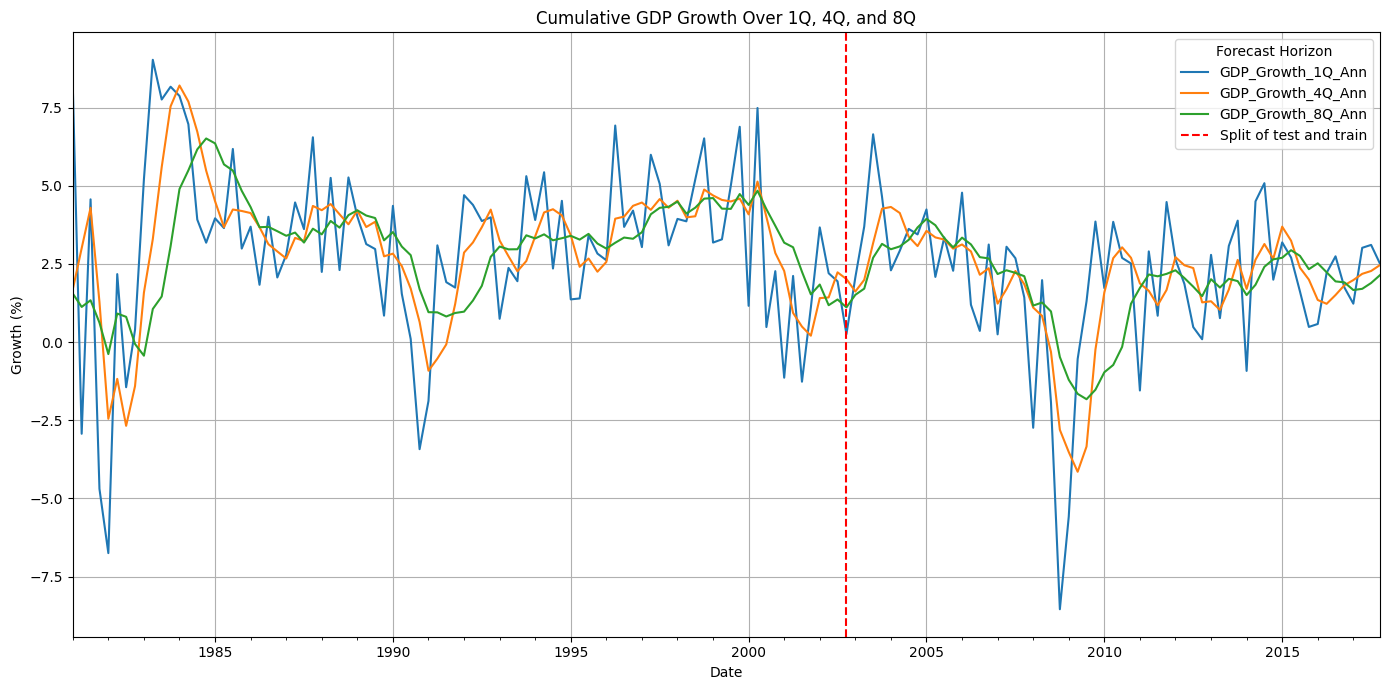

In [ ]:
# make a plot with all 3 dependent variables


# combine the train and test into one df
plot_df = pd.concat([train_df,test_df])
# convert data into appropriate format
plot_df["date"] = pd.to_datetime(plot_df["date"])
plot_df = plot_df.set_index("date")

# the variables to plot
columns_to_plot = ["GDP_Growth_1Q_Ann", "GDP_Growth_4Q_Ann", "GDP_Growth_8Q_Ann"]
# make a plot
plot_df[columns_to_plot].plot(figsize=(14,7))



# put a line between test and train data
plt.axvline(pd.to_datetime("2002-10-01"), color='red', linestyle='--', label="Split of test and train")

# make plot nicer
plt.title("Cumulative GDP Growth Over 1Q, 4Q, and 8Q")
plt.xlabel("Date")
plt.ylabel("Growth (%)")
plt.grid(True)
plt.legend(title="Forecast Horizon")
plt.tight_layout()
plt.show()

In [ ]:
# test stationarity

from statsmodels.tsa.stattools import adfuller

columns_to_plot = ["GDP_Growth_1Q_Ann", "GDP_Growth_4Q_Ann", "GDP_Growth_8Q_Ann", "GDP_Growth"]


for h in columns_to_plot:
  series = plot_df["GDP_Growth_8Q_Ann"].dropna()
  # Run the test
  result = adfuller(series)

  # Output results
  print("ADF Statistic:", result[0])
  print("p-value:", result[1])
  for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

# all the variables are stationary

ADF Statistic: -2.7593352193751297
p-value: 0.06432131221704827
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056
ADF Statistic: -2.7593352193751297
p-value: 0.06432131221704827
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056
ADF Statistic: -2.7593352193751297
p-value: 0.06432131221704827
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056
ADF Statistic: -2.7593352193751297
p-value: 0.06432131221704827
Critical Value (1%): -3.47864788917503
Critical Value (5%): -2.882721765644168
Critical Value (10%): -2.578065326612056


In [ ]:
# c)
# import the variable from FRED
# we will use use Long-Term Government Bond Yields
# available at https://fred.stlouisfed.org/series/IRLTLT01USQ156N
data2 = files.upload()

Saving IRLTLT01USQ156N.xlsx to IRLTLT01USQ156N.xlsx


In [ ]:
# import the dataset
# there were many problems with correctly importing data
# this cell is about cleaning the data
filename2 = list(data2.keys())[0]  # Get uploaded file name
df2 =  pd.read_excel(filename2, sheet_name='Quarterly')
df2.rename(columns={df2.columns[0]: "date"}, inplace=True)



df2["date"] = pd.to_datetime(df2["date"],dayfirst=True, errors='coerce')

df3 = df2.loc[(df2["date"] >= "1981-01-01") & (df2["date"] <= "2002-09-30")]
df4 = df2.loc[(df2["date"] >= "2002-10-01") & (df2["date"] <= "2017-12-31")]


X_train = df3['IRLTLT01USQ156N']
X_test = df4['IRLTLT01USQ156N']

X_train.reset_index(drop=True)
X_train

# correct number of rows and correct specified date

,IRLTLT01USQ156N
111,12.960000
112,13.750000
113,14.846667
114,14.086667
115,14.293333
...,...
193,4.980000
194,4.770000
195,5.076667
196,5.100000


In [ ]:
# merge the data

merged_train = train_df.copy()
merged_train["LTGB"] = X_train.values

merged_test = test_df.copy()
merged_test["LTGB"] = X_test.values


merged_train

,date,GDPC1,GDP_Change,LN_GDP,GDP_Growth,GDP_Growth_1Q_Ann,GDP_Growth_2Q_Ann,GDP_Growth_3Q_Ann,GDP_Growth_4Q_Ann,GDP_Growth_5Q_Ann,GDP_Growth_6Q_Ann,GDP_Growth_7Q_Ann,GDP_Growth_8Q_Ann,RSPREAD,LTGB
84,1981-01-31,6635.726,134.542,8.800223,0.020484,8.193507,7.769359,4.977394,1.684062,1.605607,1.510372,1.703449,1.551012,-1.430000,12.960000
85,1981-04-30,6587.269,-48.457,8.792894,-0.007329,-2.931694,2.630907,4.202341,3.000122,0.760910,0.849390,0.875791,1.124056,-1.156667,13.750000
86,1981-07-31,6662.858,75.589,8.804304,0.011410,4.563870,0.816088,3.275228,4.292724,3.312871,1.394737,1.380030,1.336801,-0.206667,14.846667
87,1981-10-31,6585.127,-77.731,8.792569,-0.011735,-4.693960,-0.065045,-1.020595,1.282931,2.495387,1.978399,0.524923,0.620781,2.336667,14.086667
88,1982-01-31,6474.973,-110.154,8.775700,-0.016869,-6.747673,-5.720817,-2.292588,-2.452364,-0.323190,0.954877,0.731818,-0.384151,1.480000,14.293333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2001-07-31,12670.106,-40.197,9.447001,-0.003168,-1.267026,0.423855,-0.097117,0.493953,0.491326,1.656875,1.585752,2.247996,1.810000,4.980000
167,2001-10-31,12705.269,35.163,9.449772,0.002771,1.108572,-0.079227,0.652094,0.204305,0.616876,0.594201,1.578546,1.526104,2.863333,4.770000
168,2002-01-31,12822.258,116.989,9.458938,0.009166,3.666311,2.387441,1.169286,1.405648,0.896706,1.125115,1.033073,1.839517,3.356667,5.076667
169,2002-04-30,12893.002,70.744,9.464440,0.005502,2.200847,2.933579,2.325243,1.427176,1.564688,1.114063,1.278791,1.179045,3.386667,5.100000


In [ ]:
def regress_GDP_new_var(dataset, h ):

  X2 = pd.DataFrame()

# create lags
  X2[f"GDP_Growth_lag{1}"] = merged_train["GDP_Growth"]
  X2[f"GDP_Growth_lag{2}"] = merged_train["GDP_Growth"].shift(1)

  X2[f"LTGB{1}"] = merged_train["LTGB"]
  X2[f"LTGB{2}"] = merged_train["LTGB"].shift(1)


  X2 = sm.add_constant(X2)
  X2 = X2.dropna().reset_index(drop=True)
  X2 = X2.iloc[:-h]

  Y2 = merged_train[dataset].iloc[(h+1):]
  diagnostics_df2 = pd.concat([X2, Y2], axis=1)

  Y2 = Y2.reset_index(drop=True)
  X2 = X2.reset_index(drop=True)



  model = sm.OLS(Y2, X2)
  results = model.fit(cov_type='HC3')

  return results

results11 = regress_GDP_new_var( "GDP_Growth_1Q_Ann", 1)
results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      GDP_Growth_1Q_Ann   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.111
Date:                Thu, 10 Apr 2025   Prob (F-statistic):             0.0197
Time:                        18:25:50   Log-Likelihood:                -191.62
No. Observations:                  85   AIC:                             393.2
Df Residuals:                      80   BIC:                             405.4
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8398      1.058      1.739      0.082      -0.234       3.913
GDP_Growth_lag1   120.4434     75.897      1.587      0.113     -28.312     269.198
GDP_Growth_lag2   124.1202     60.452      2.053      0.040       5.636     242.604
LTGB1              -0.4570      0.718     -0.637      0.524      -1.863       0.949
LTGB2               0.3795      0.678      0.559      0.576      -0.950       1.709
==============================================================================
Omnibus:                        4.350   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.364
Skew:                          -0.258   Prob(JB):                        0.113
Kurtosis:                       3.982   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# this code is very similar to predictions done in question 1 a)
def prediction_new_var(results,data, h):
  X_test = pd.DataFrame()


# make prediction
  X_test[f"GDP_Growth_lag{1}"] = merged_test["GDP_Growth"]
  X_test[f"GDP_Growth_lag{2}"] = merged_test["GDP_Growth"].shift(1)

  X_test[f"LTGB{1}"] = merged_test["LTGB"]
  X_test[f"LTGB{2}"] = merged_test["LTGB"].shift(1)



  X_test = sm.add_constant(X_test)
  X_test = X_test.dropna().reset_index(drop=True)
  X_test = X_test.iloc[:-h]


  actual_values=merged_test[data].iloc[(h+1):]
  actual_values= actual_values.dropna().reset_index(drop=True)



  y_pred = results.predict(X_test)
  rmse = np.sqrt(((y_pred - actual_values) ** 2).mean())


  return rmse


new_var_results = []

Dependent_variables = {
        "GDP_Growth_1Q_Ann": 1,
        "GDP_Growth_4Q_Ann": 4,
        "GDP_Growth_8Q_Ann": 8,
    }


for dataset22, h22 in Dependent_variables.items():
        results33 = regress_GDP_new_var(dataset22, h22)  # Pass correct lags
        error111 = prediction_new_var(results33, dataset22, h22)
        new_var_results.append(( error111))  # Store as a tuple


new_var_results

# the results seem to improve for longer forecasts


[np.float64(2.3991536073654918),
 np.float64(1.968133343265501),
 np.float64(1.810810943062437)]